In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mltools import my_convert_to_number, my_convert_to_date
from wordcloud import WordCloud
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
sns.set(style="darkgrid")

In [104]:
odi_df = pd.read_csv('ODI-2022.csv',delimiter=";")

### Number of records

In [105]:
print(len(odi_df.index))

304


### Number of attributes

In [106]:
print(len(odi_df.columns))

17


### Attributes
    

In [107]:
print((odi_df.columns))

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')


## Data treatment

### Rename columns

In [108]:
 odi_df.columns = ['time',\
                   'program',\
                   'ML',\
                   'IR',\
                   'Statistics',\
                   'DB',\
                   'Gender',\
               'Chocolate_influence',\
                   'Birthday',\
                   'neighbors',\
                   'Stand_Up',\
                   'Stress',\
              'Euros_Question',\
                   'random_number',\
                   'time_to_bed',\
                   'good_day_1',\
                   'good_day_2']
display(odi_df)

,time,program,ML,IR,Statistics,DB,Gender,Chocolate_influence,Birthday,neighbors,Stand_Up,Stress,Euros_Question,random_number,time_to_bed,good_day_1,good_day_2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food
5,4-5-2022 12:12:20,Artificial Intelligence,no,unknown,sigma,unknown,female,fat,28,0,no,48,1000,87,2130,This lecture,Sun
6,4-5-2022 12:12:26,Artificial Intelligence,yes,0,unknown,nee,male,neither,15.10.98,1,no,20,0.1,6,00:35,sunshine,happiness
7,4-5-2022 12:12:29,M Artificial Intelligence,yes,0,unknown,ja,male,neither,17 November,0,no,100,10,50,23,Rainy Day,Weekend
8,4-5-2022 12:12:29,FinTech,yes,0,mu,ja,male,neither,1995,0,no,20,100 / the number of people,42,23:00,Food,Relaxation
9,4-5-2022 12:12:29,Artificial Intelligence,no,0,mu,ja,female,fat,21-07-2000,5,yes,50,10,88,12 hours,"sun, friends and wine","relaxing, watching a show, hockey"


### Data conversion to fysical values

In [109]:
odi_df[['Birthday' ]] = odi_df[['Birthday']].applymap(my_convert_to_date, default=pd.NaT)
#treating years as nan when less than Timestamp.min or gretaer than timestamp.max
odi_df['Birthday' ] = pd.to_datetime(odi_df['Birthday' ], errors = 'coerce')

odi_df['time'] = odi_df[['time']].applymap(my_convert_to_date, default=pd.NaT)
odi_df[['random_number', 'Stress', 'neighbors', 'Euros_Question' ]] = odi_df[['random_number', 'Stress', 'neighbors', 'Euros_Question']].applymap(my_convert_to_number)
odi_df[['ML','IR','DB','Stand_Up']] = odi_df[['ML','IR','DB', 'Stand_Up']].replace({"yes", 'ja', "1"}, True)
odi_df[['ML','IR','DB', 'Stand_Up']] = odi_df[['ML','IR','DB', 'Stand_Up']].replace({"no", 'nee', "0"}, False)
odi_df[['ML','IR','DB', 'Stand_Up']] = odi_df[['ML','IR','DB', 'Stand_Up']].replace("unknown", None)

### age calculation


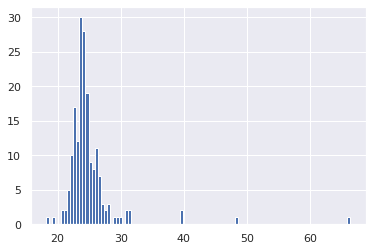

In [122]:
odi_df['age'] = odi_df['time'] - odi_df['Birthday']
#setting age more than 90 years to None
odi_df['age'] = odi_df['age'].dt.days/365
odi_df['age'].loc[odi_df['age']>90] = None
odi_df['age'].loc[odi_df['age']<10] = None
hist = odi_df['age'].hist(bins=100)

### Gender distribution

In [ ]:
display(odi_df.groupby('Gender')['Gender'].count())
odi_df.groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
#mask = (odi_df['Gender']!='male') & (odi_df['Gender']!='female')
#odi_df['Gender'].loc[mask]

### correlations

In [ ]:
odi_df.corr(method ='pearson')

### Pie chart of Gender put None as random number - no rule obeing 

In [ ]:
plt.figure(1)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for erronious data in random number')

plt.figure(2)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()==False].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for correct data in random number')


### Good day distribution

In [ ]:
dictionary=Counter(list(odi_df['good_day_1'].map(lambda x: x.lower()))+list(odi_df['good_day_2'].map(lambda x: x.lower())))
#sns.boxplot(pd.Series(dictionary, index=dictionary.keys()).sort_values(ascending=False), x=index)
#cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
#plt.figure(figsize=(16,12))
#plt.imshow(cloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

#plt.bar(dictionary)
pd.set_option("display.max_rows", None, "display.max_columns", None)
odi_df['ML']

In [ ]:
frequent_itemsets = apriori(odi_df[['ML','IR','DB']], min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
print(rules)